# Hey Folks
Lets look at some insurance data to analyse various aspects effecting charges and also try to fit a Linear regression model to it.



## Getting libraries and dependencies
I have downloaded all the libraries and dependencies required in a single cell.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as pl

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#ignore warnigns
import warnings
warnings.filterwarnings(action='ignore', message="^internal")

In [6]:
# Reading the data
data = pd.read_csv('insurance.csv')
data.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Getting more info
Now that we know how the data looks like and its shape now  lets dive a little more into what our data comprises of ```info()``` will be perfect for this job. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see age, bmi, children and charges variables are all numerical data where as sex, smoker and region are what we can assume categorical.

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.shape

(1338, 7)

Well lets just call it a habit although the previous steps like ```info()``` already gave us quiet the clear picture of the data still just had to. But anyways HURRAY no null data one rarely encounters such "good" data.

### Describing the data
Lets get more detail about the data like mean, mode, count ....

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Encoding Categorical Features

Encoding the categorical features into numeric values so that it make easier to fit the model later down the line. I am using ```LabelEncoder()``` provided by sckit learn to do the job.

In [11]:
#Encode Categorical Features

le = LabelEncoder()
#sex
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
# smoker
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Finding the correlation 

Lets see the correlation between charges and other variables in order and visualize it using a heatma using seaborn ```heatmap()```

In [12]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

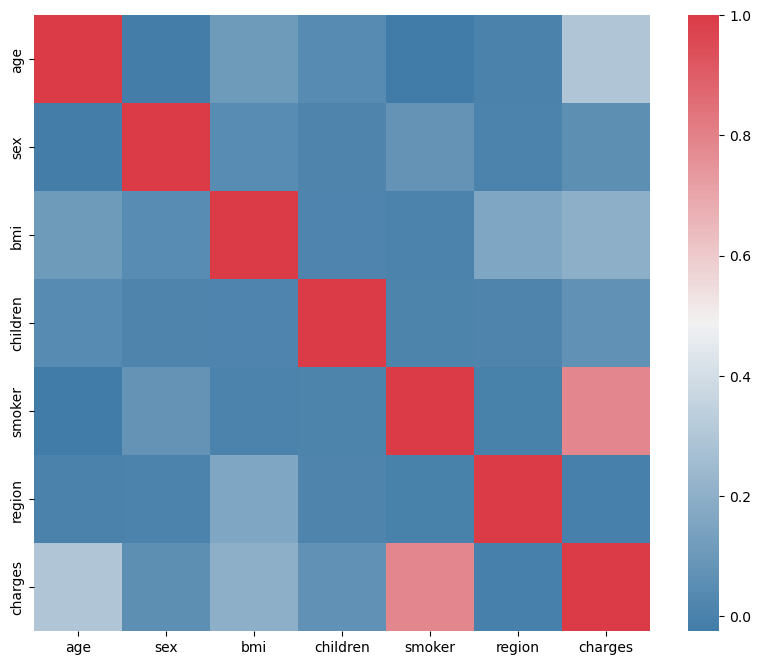

In [13]:
#visualising corelation using heatmap
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),square=True, ax=ax)

well the surpring outcome here is such high correlation between smoker and charges, to be frank I expected bmi to score the highest.

### Deeper into smokers
Diving deeper into smokers the distribution of charges for smokers and non smokers.

In [ ]:
#visualizing distribution of smokers and non smokers
f= pl.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.distplot(data[(data.smoker ==0)]['charges'], color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(data[(data.smoker ==1)]['charges'], color='r',ax=ax)
ax.set_title('Distribution of charges for smokers')



Well the result is pretty self explanatory " Smoking Kills Kids ". Also I have a feeling we have got a larger no of non smokers than smokers we will also explore it later.

Lets go on a little tangent i was really curious on the age of these smokers.


C:\Users\poude\AppData\Local\Temp\ipykernel_9224\2543437276.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.smoker ==1)]['age'], color='b',ax=ax)


Text(0.5, 1.0, 'Distribution of age for smokers')

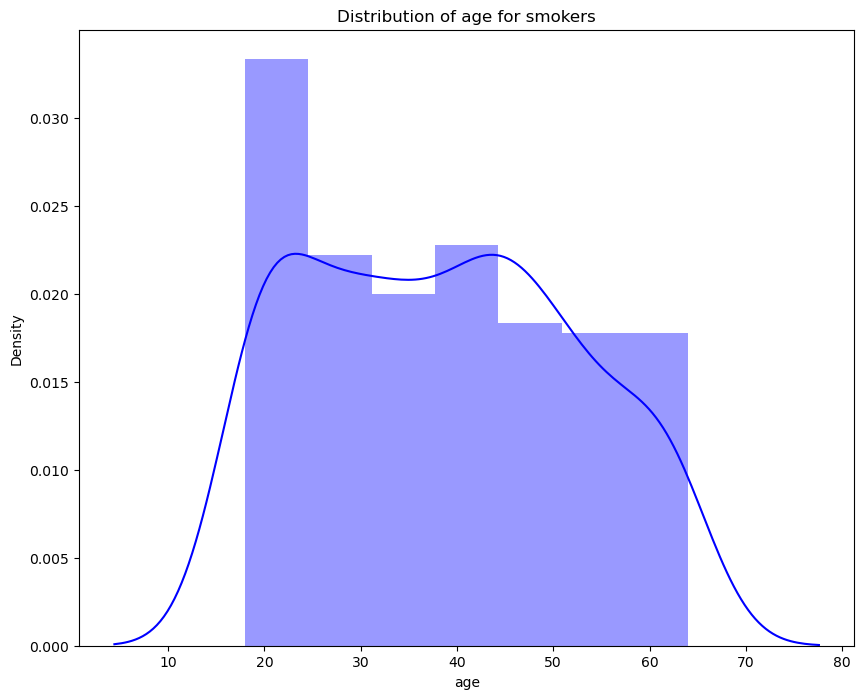

In [15]:
#visualizing distribution of age for smokers
f ,ax = pl.subplots(figsize=(10,8))
sns.distplot(data[(data.smoker ==1)]['age'], color='b',ax=ax)
ax.set_title('Distribution of age for smokers')


### Visuslizing the no of smokers
Lets visualize the no of smokers and non smokers according to gender.

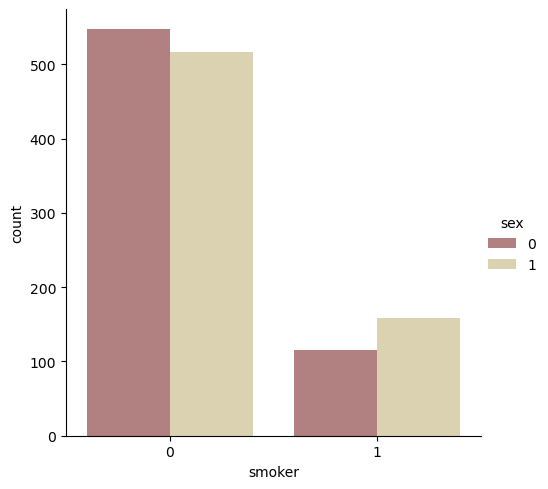

In [16]:
#visualizing count of smokers according to age
sns.catplot(x='smoker', kind='count', hue='sex', palette='pink', data=data)

### Linear Regression

Finally getting to the linear regression part. I am doing the following:
- x = input variables, y= output variable here charges
- Then splitting the data into Training set and Testing set
- Fitting the training set using ```LinearRegression()``` from scikit learn
- Predicting the values of y
- Testing the score of this model 


In [17]:
#Linear Regression
x= data.drop(['charges'], axis =1)
y= data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0)
lr= LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test, y_test))

0.7962732059725786


Not bad for such an lazy implementation, Next time I plan to do it from scratch.


### Visualizing the Performance
Now lets visualize the performance of our marvelous model.
- First checking the linearity by creating a scatter plot of y_test and y_test_pred
- Then Checking the Residual Normality and mean ( Bell shape curve == good ) 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\poude\AppData\Local\Temp\ipykernel_9224\2464767464.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_test_pred),ax=ax,color='b')


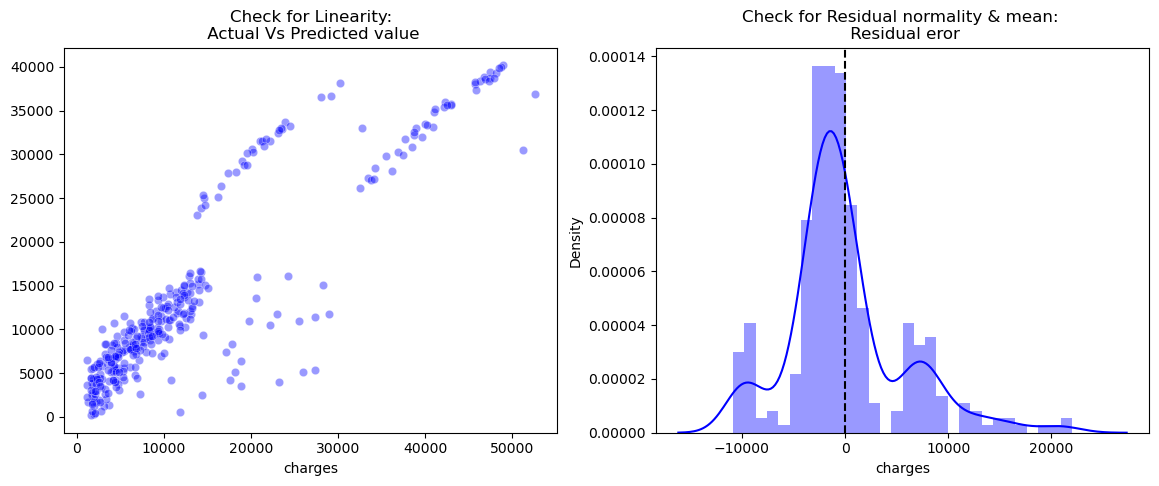

In [23]:
#check for Linearity
f = pl.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_test_pred,ax=ax,color='b', alpha=0.4, cmap=pl.get_cmap("jet"))
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')


# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_test_pred),ax=ax,color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

##### FINALLY Launch, Monitor and Maintain I Guess
###### SEE YAA!!!
